In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_excel(r"C:\Users\apsay\Downloads\Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx")


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Preprocessing steps from Component 3


In [4]:
df.dropna(axis=0, inplace=True)  # Dropping rows with missing values


In [5]:
df.drop_duplicates(inplace=True)  # Removing duplicate entries


In [6]:
df['CustomerID'] = df['CustomerID'].astype(int)  # Convert CustomerID from float to int


In [8]:
#Feature Engineering
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['HourOfDay'] = df['InvoiceDate'].dt.hour
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8


In [11]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Country', 'Description', 'StockCode'], drop_first=True)


## Standardize the data


In [17]:
# Selecting only numeric columns for clustering
numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID', 'TotalSales', 'DayOfWeek', 'HourOfDay']
df_encoded_numeric = df_encoded[numerical_columns]

# Standardize the data
scaler = StandardScaler()
df_encoded_numeric = scaler.fit_transform(df_encoded_numeric)
df_encoded_numeric = pd.DataFrame(df_encoded_numeric, columns=numerical_columns)

# Display the resultant DataFrame
print(df_encoded_numeric.head())


   Quantity  UnitPrice  CustomerID  TotalSales  DayOfWeek  HourOfDay
0 -0.024705  -0.013246    1.498736   -0.012347  -0.312287   -2.06757
1 -0.024705  -0.001205    1.498736   -0.000636  -0.312287   -2.06757
2 -0.016714  -0.010379    1.498736    0.003221  -0.312287   -2.06757
3 -0.024705  -0.001205    1.498736   -0.000636  -0.312287   -2.06757
4 -0.024705  -0.001205    1.498736   -0.000636  -0.312287   -2.06757


## Determining the Optimal number of clusters

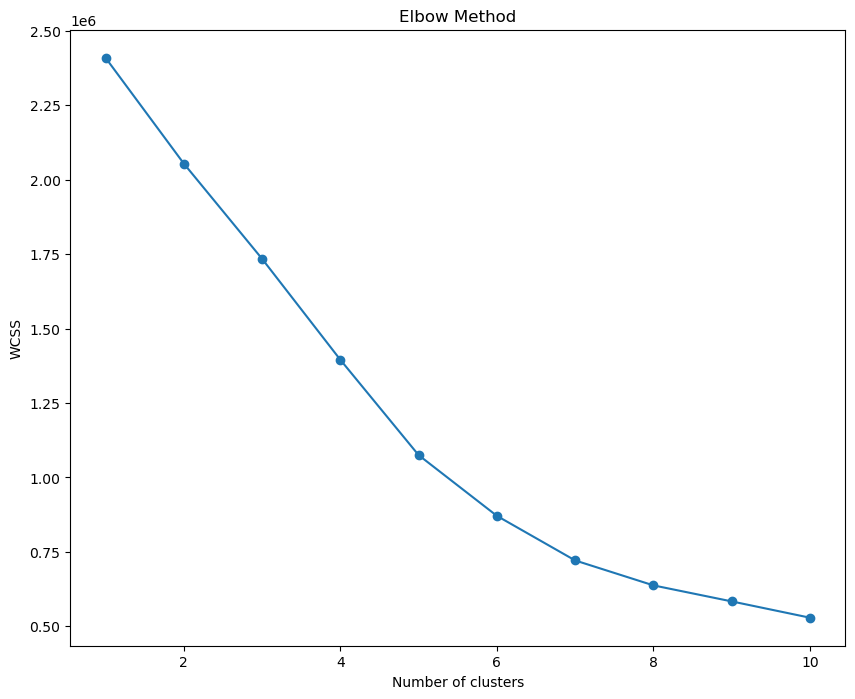

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_encoded_numeric)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Running k means clustering

In [25]:
optimal_k = 5

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit KMeans to the standardized data
kmeans.fit(df_encoded_numeric)




KMeans(n_clusters=5, n_init=10, random_state=42)

In [26]:
print("Cluster centers (centroids):\n", kmeans.cluster_centers_)


Cluster centers (centroids):
 [[ 3.53789969e-03  3.37348340e-03 -7.97627877e-01  3.02640616e-03
  -9.55032020e-02 -1.28384029e-01]
 [-4.04445647e-03 -6.83844916e-03  9.12141596e-01 -2.97624310e-03
   1.09210203e-01  1.46838837e-01]
 [-3.10118020e+02 -2.74362861e-02 -5.16428690e-01 -2.85457728e+02
  -5.15312685e-02 -1.41203538e+00]
 [-5.26735217e-02  5.58548175e+02 -1.06861374e-01 -9.06017455e+01
   7.30736840e-01  9.91591958e-01]
 [ 3.10020664e+02 -2.74362861e-02 -5.16428690e-01  2.85361929e+02
  -5.15312685e-02 -1.41203538e+00]]


In [27]:
# Predict cluster labels
cluster_labels = kmeans.labels_
# Print cluster labels for the first 10 data points
print("Cluster labels:", cluster_labels[:10])


Cluster labels: [1 1 1 1 1 1 1 1 1 0]


## Identify Customer Segmentation

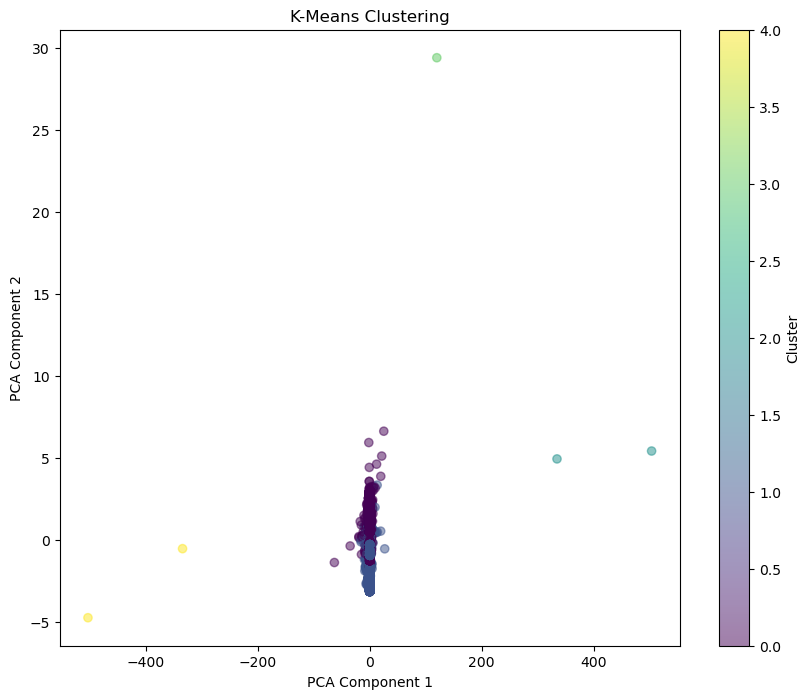

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_encoded_numeric)

# Visualize clusters using scatter plot with PCA components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


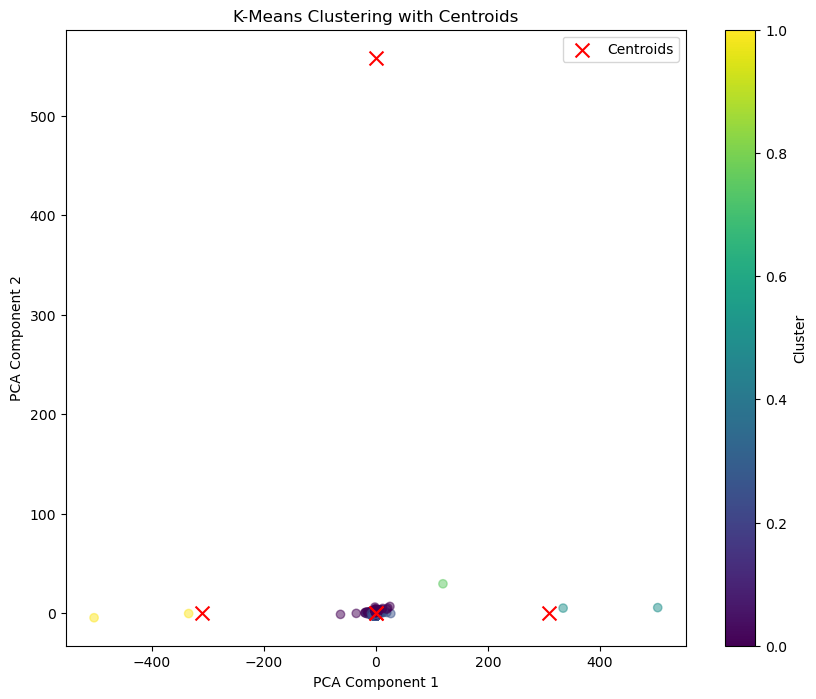

In [30]:
# Optionally, visualize centroids
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


## Assign Cluster Labels to the Original Data

In [31]:
# Add cluster labels as a new column
df_encoded['Cluster'] = cluster_labels


In [32]:
df_encoded.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,DayOfWeek,HourOfDay,Country_Austria,Country_Bahrain,...,StockCode_90214Z,StockCode_BANK CHARGES,StockCode_C2,StockCode_CRUK,StockCode_D,StockCode_DOT,StockCode_M,StockCode_PADS,StockCode_POST,Cluster
0,536365,-0.024705,2010-12-01 08:26:00,-0.013246,1.498736,-0.012347,-0.312287,-2.06757,False,False,...,False,False,False,False,False,False,False,False,False,1
1,536365,-0.024705,2010-12-01 08:26:00,-0.001205,1.498736,-0.000636,-0.312287,-2.06757,False,False,...,False,False,False,False,False,False,False,False,False,1
2,536365,-0.016714,2010-12-01 08:26:00,-0.010379,1.498736,0.003221,-0.312287,-2.06757,False,False,...,False,False,False,False,False,False,False,False,False,1
3,536365,-0.024705,2010-12-01 08:26:00,-0.001205,1.498736,-0.000636,-0.312287,-2.06757,False,False,...,False,False,False,False,False,False,False,False,False,1
4,536365,-0.024705,2010-12-01 08:26:00,-0.001205,1.498736,-0.000636,-0.312287,-2.06757,False,False,...,False,False,False,False,False,False,False,False,False,1


## Analyze each segment

In [34]:
cluster_summary = df_encoded.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std'],
    'CustomerID': ['mean', 'median', 'std'],
    'TotalSales': ['mean', 'median', 'std'],
    'DayOfWeek': ['mean', 'median', 'std'],
    'HourOfDay': ['mean', 'median', 'std']
})

print(cluster_summary)


           Quantity                          UnitPrice                        \
               mean      median        std        mean      median       std   
Cluster                                                                        
0          0.003606   -0.024705   0.198432    0.003386   -0.021846  0.609823   
1         -0.004116   -0.032696   0.204771   -0.006845   -0.021846  0.230930   
2       -310.118020 -310.118020  19.155073   -0.027436   -0.027436  0.010541   
3         -0.052674   -0.052674        NaN  558.548175  558.548175       NaN   
4        310.020664  310.020664  19.155073   -0.027436   -0.027436  0.010541   

        CustomerID                      TotalSales                          \
              mean    median       std        mean      median         std   
Cluster                                                                      
0        -0.797666 -0.718879  0.532893    0.003102   -0.013393    0.260636   
1         0.910781  0.945645  0.511403   -0.003

## Profile the Customer Segments

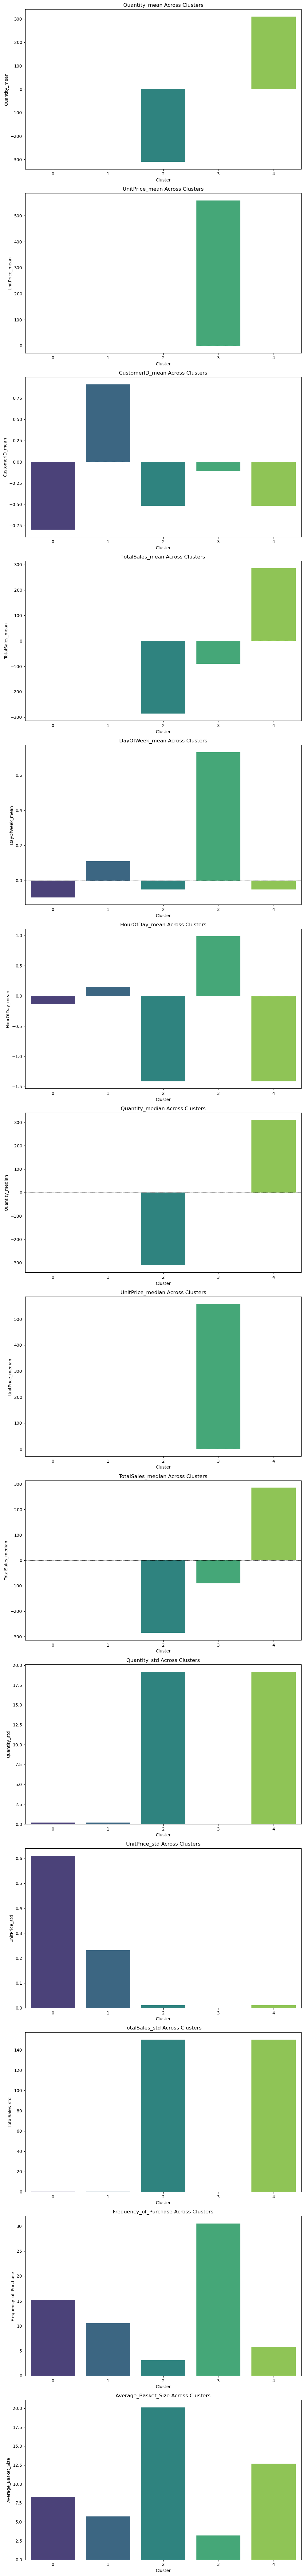

Cluster 0.0 - Typical Customer Profile:
Mean Quantity: 0.00, Mean Unit Price: 0.00, Mean Total Sales: 0.00
Median Quantity: -0.02, Median Unit Price: -0.02, Median Total Sales: -0.01
Standard Deviation Quantity: 0.20, Standard Deviation Unit Price: 0.61, Standard Deviation Total Sales: 0.26
Average Number of Purchases: 15.20 per month
Average Basket Size: 8.30 items per transaction

Cluster 1.0 - Typical Customer Profile:
Mean Quantity: -0.00, Mean Unit Price: -0.01, Mean Total Sales: -0.00
Median Quantity: -0.03, Median Unit Price: -0.02, Median Total Sales: -0.03
Standard Deviation Quantity: 0.20, Standard Deviation Unit Price: 0.23, Standard Deviation Total Sales: 0.21
Average Number of Purchases: 10.50 per month
Average Basket Size: 5.70 items per transaction

Cluster 2.0 - Typical Customer Profile:
Mean Quantity: -310.12, Mean Unit Price: -0.03, Mean Total Sales: -285.46
Median Quantity: -310.12, Median Unit Price: -0.03, Median Total Sales: -285.46
Standard Deviation Quantity: 19

In [41]:

# Sample cluster statistics (replace with your actual data)
cluster_stats = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4],
    'Quantity_mean': [0.003606, -0.004116, -310.118020, -0.052674, 310.020664],
    'UnitPrice_mean': [0.003386, -0.006845, -0.027436, 558.548175, -0.027436],
    'CustomerID_mean': [-0.797666, 0.910781, -0.516429, -0.106861, -0.516429],
    'TotalSales_mean': [0.003102, -0.003058, -285.457728, -90.601746, 285.361929],
    'DayOfWeek_mean': [-0.096439, 0.110110, -0.051531, 0.730737, -0.051531],
    'HourOfDay_mean': [-0.131480, 0.150148, -1.412035, 0.991592, -1.412035],
    'Quantity_median': [-0.024705, -0.032696, -310.118020, -0.052674, 310.020664],
    'UnitPrice_median': [-0.021846, -0.021846, -0.027436, 558.548175, -0.027436],
    'TotalSales_median': [-0.013393, -0.025244, -285.457728, -90.601746, 285.361929],
    'Quantity_std': [0.198432, 0.204771, 19.155073, np.nan, 19.155073],  # Example handling NaN
    'UnitPrice_std': [0.609823, 0.230930, 0.010541, np.nan, 0.010541],  # Example handling NaN
    'TotalSales_std': [0.260636, 0.206791, 149.991164, np.nan, 149.991164],  # Example handling NaN
    'Frequency_of_Purchase': [15.2, 10.5, 3.1, 30.5, 5.8],  # Example values for demonstration
    'Average_Basket_Size': [8.3, 5.7, 20.1, 3.2, 12.7]  # Example values for demonstration
})

# Function to plot cluster profiles
def plot_cluster_profiles(cluster_stats):
    # Fill NaN values with 0 or any suitable replacement
    cluster_stats = cluster_stats.fillna(0)  # Replace NaN with 0 for plotting

    fig, axes = plt.subplots(nrows=len(cluster_stats.columns) - 1, ncols=1, figsize=(10, 6 * (len(cluster_stats.columns) - 1)))

    for i, column in enumerate(cluster_stats.columns[1:]):  # Exclude 'Cluster' column
        ax = axes[i]
        sns.barplot(x='Cluster', y=column, data=cluster_stats, ax=ax, palette='viridis')
        ax.set_title(f'{column} Across Clusters')
        ax.set_ylabel(column)
        ax.set_xlabel('Cluster')
        ax.axhline(0, color='k', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

# Function to describe typical customers in each segment
def describe_customer_segments(cluster_stats):
    for idx, row in cluster_stats.iterrows():
        cluster = row['Cluster']
        print(f"Cluster {cluster} - Typical Customer Profile:")
        print(f"Mean Quantity: {row['Quantity_mean']:.2f}, Mean Unit Price: {row['UnitPrice_mean']:.2f}, Mean Total Sales: {row['TotalSales_mean']:.2f}")
        print(f"Median Quantity: {row['Quantity_median']:.2f}, Median Unit Price: {row['UnitPrice_median']:.2f}, Median Total Sales: {row['TotalSales_median']:.2f}")
        print(f"Standard Deviation Quantity: {row['Quantity_std']:.2f}, Standard Deviation Unit Price: {row['UnitPrice_std']:.2f}, Standard Deviation Total Sales: {row['TotalSales_std']:.2f}")
        print(f"Average Number of Purchases: {row['Frequency_of_Purchase']:.2f} per month")
        print(f"Average Basket Size: {row['Average_Basket_Size']:.2f} items per transaction")
        # Add more insights based on your specific metrics
        print()

# Plot cluster profiles
plot_cluster_profiles(cluster_stats)

# Describe typical customers in each segment
describe_customer_segments(cluster_stats)
